In [0]:
# Install fastai
#!pip install fastai==0.7.0 

In [0]:
from fastai.conv_learner import *
from fastai.dataset import *
from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [0]:

# Install PyTorch# Insta 
#!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
#!pip3 install torchvision

In [0]:
!mkdir data

In [10]:
!wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar -P data/


Redirecting output to ‘wget-log’.


In [11]:
!wget https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip -P data/


Redirecting output to ‘wget-log.1’.


In [12]:
!tar -xvf  data/VOCtrainval_06-Nov-2007.tar -C data/

VOCdevkit/
VOCdevkit/VOC2007/
VOCdevkit/VOC2007/Annotations/
VOCdevkit/VOC2007/Annotations/000005.xml
VOCdevkit/VOC2007/Annotations/000007.xml
VOCdevkit/VOC2007/Annotations/000009.xml
VOCdevkit/VOC2007/Annotations/000012.xml
VOCdevkit/VOC2007/Annotations/000016.xml
VOCdevkit/VOC2007/Annotations/000017.xml
VOCdevkit/VOC2007/Annotations/000019.xml
VOCdevkit/VOC2007/Annotations/000020.xml
VOCdevkit/VOC2007/Annotations/000021.xml
VOCdevkit/VOC2007/Annotations/000023.xml
VOCdevkit/VOC2007/Annotations/000024.xml
VOCdevkit/VOC2007/Annotations/000026.xml
VOCdevkit/VOC2007/Annotations/000030.xml
VOCdevkit/VOC2007/Annotations/000032.xml
VOCdevkit/VOC2007/Annotations/000033.xml
VOCdevkit/VOC2007/Annotations/000034.xml
VOCdevkit/VOC2007/Annotations/000035.xml
VOCdevkit/VOC2007/Annotations/000036.xml
VOCdevkit/VOC2007/Annotations/000039.xml
VOCdevkit/VOC2007/Annotations/000041.xml
VOCdevkit/VOC2007/Annotations/000042.xml
VOCdevkit/VOC2007/Annotations/000044.xml
VOCdevkit/VOC2007/Annotations/000046.

In [13]:
!unzip  data/PASCAL_VOC.zip -d data/

Archive:  data/PASCAL_VOC.zip
   creating: data/PASCAL_VOC/
  inflating: data/PASCAL_VOC/pascal_test2007.json  
  inflating: data/PASCAL_VOC/pascal_train2007.json  
  inflating: data/PASCAL_VOC/pascal_train2012.json  
  inflating: data/PASCAL_VOC/pascal_val2007.json  
  inflating: data/PASCAL_VOC/pascal_val2012.json  


In [9]:
ls data/PASCAL_VOC

ls: cannot access 'data/PASCAL_VOC': No such file or directory


In [14]:
import torch
torch.cuda.is_available()

True

In [0]:
from fastai.conv_learner import *
from fastai.dataset import *
from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [0]:
PATH=Path('data')

In [14]:
list(PATH.iterdir())

[PosixPath('data/PASCAL_VOC'),
 PosixPath('data/PASCAL_VOC.zip'),
 PosixPath('data/VOCdevkit'),
 PosixPath('data/VOCtrainval_06-Nov-2007.tar')]

In [0]:
trn_j=json.load((PATH/'PASCAL_VOC/pascal_train2007.json').open())

In [0]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']

In [16]:
trn_j[IMAGES][0]

{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500}

In [19]:
trn_j[ANNOTATIONS][0]

{'area': 34104,
 'bbox': [155, 96, 196, 174],
 'category_id': 7,
 'id': 1,
 'ignore': 0,
 'image_id': 12,
 'iscrowd': 0,
 'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]}

In [20]:
trn_j[CATEGORIES]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'},
 {'id': 5, 'name': 'bottle', 'supercategory': 'none'},
 {'id': 6, 'name': 'bus', 'supercategory': 'none'},
 {'id': 7, 'name': 'car', 'supercategory': 'none'},
 {'id': 8, 'name': 'cat', 'supercategory': 'none'},
 {'id': 9, 'name': 'chair', 'supercategory': 'none'},
 {'id': 10, 'name': 'cow', 'supercategory': 'none'},
 {'id': 11, 'name': 'diningtable', 'supercategory': 'none'},
 {'id': 12, 'name': 'dog', 'supercategory': 'none'},
 {'id': 13, 'name': 'horse', 'supercategory': 'none'},
 {'id': 14, 'name': 'motorbike', 'supercategory': 'none'},
 {'id': 15, 'name': 'person', 'supercategory': 'none'},
 {'id': 16, 'name': 'pottedplant', 'supercategory': 'none'},
 {'id': 17, 'name': 'sheep', 'supercategory': 'none'},
 {'id': 18, 'name': 'sofa', 'supercategory': 'none'},
 {'id': 

In [0]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

In [0]:
cats=dict((x[ID],x['name']) for x in trn_j[CATEGORIES])

In [0]:
trn_fns=dict((x[ID],x[FILE_NAME]) for x in trn_j[IMAGES])

In [0]:
trn_ids=[x[ID] for x in trn_j[IMAGES]]

In [0]:
JPEGS='VOCdevkit/VOC2007/JPEGImages'
PATH_IMG=PATH/JPEGS

In [22]:
list(PATH_IMG.iterdir())[:4]

[PosixPath('data/VOCdevkit/VOC2007/JPEGImages/006538.jpg'),
 PosixPath('data/VOCdevkit/VOC2007/JPEGImages/007100.jpg'),
 PosixPath('data/VOCdevkit/VOC2007/JPEGImages/000403.jpg'),
 PosixPath('data/VOCdevkit/VOC2007/JPEGImages/005078.jpg')]

In [0]:
trn_annotation=collections.defaultdict(lambda:[])

In [0]:
for x in trn_j[ANNOTATIONS]:
  if not x['ignore']:
    bb=x[BBOX]
    bb = np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
    trn_annotation[x[IMG_ID]].append((bb,x[CAT_ID]))

In [0]:
def bb_voc(x): return np.array([x[1],x[0],x[3]-x[1],x[2]-x[0]])

In [0]:
img=open_image(PATH_IMG/trn_j[IMAGES][0][FILE_NAME])

In [31]:
bb_voc(trn_annotation[trn_j[IMAGES][0]['id']][0][0])

array([155,  96, 195, 173])

In [15]:
img.shape

(333, 500, 3)

In [0]:
def show_img(img, figsize=None, ax=None):
  if not ax:
    fig, ax=plt.subplots(figsize=figsize)
  ax.imshow(img)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  return ax

In [0]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(linewidth=lw, foreground='black'), patheffects.Normal()])

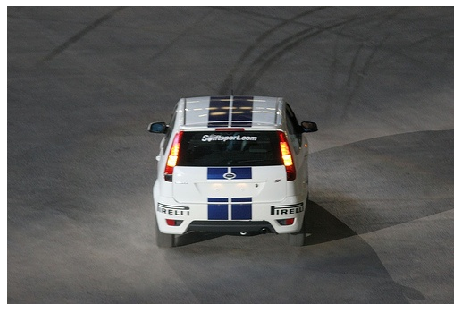

In [30]:
show_img(img)

In [0]:
def draw_rect(ax, bb):
  rect = patches.Rectangle(bb[:2], *bb[-2:],linewidth=1,edgecolor='w',facecolor='none')
  patch=ax.add_patch(rect)
  draw_outline(ax,4)

In [0]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt, verticalalignment='top', color='white',
                   fontsize=sz, weight='bold')
    draw_outline(ax, 1)

In [0]:
def draw_im(img, annotation):
    ax = show_img(img, figsize=(16,8))
    for b,c in annotation:
        b = bb_voc(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)
def draw_idx(i):
    im_a = trn_annotation[i]
    im = open_image(PATH_IMG/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


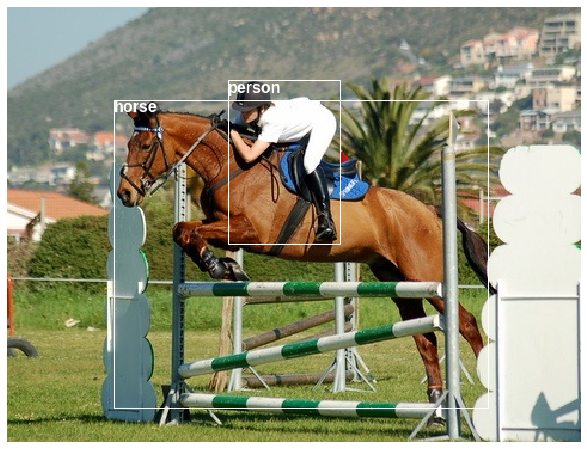

In [22]:
draw_idx(17)

In [0]:
def get_max_box(b):
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), 
               reverse=True)
    return b[0]

In [0]:
trn_max_annotation={a:get_max_box(b) for a, b in  trn_annotation.items()}

In [25]:
PATH_IMG/trn_fns[278]

PosixPath('data/VOCdevkit/VOC2007/JPEGImages/000278.jpg')

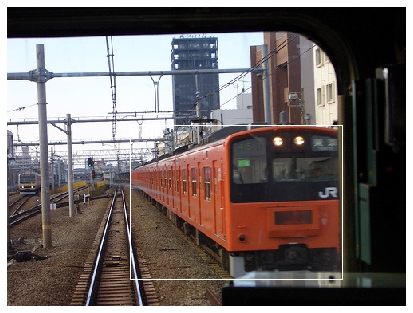

In [46]:
bbox, id_cat=trn_max_annotation[635]
bbox=bb_voc(bbox)
ax=show_img(open_image(PATH_IMG/trn_fns[635]))
draw_rect(ax, bbox)
draw_text(ax, bbox[:2], cats[id_cat],sz=16)

In [0]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [0]:
df=pd.DataFrame({'file_name':[trn_fns[i] for i in trn_ids],'category':[cats[trn_max_annotation[i][1]] for i in trn_ids]},columns=['file_name','category'])
df.to_csv(CSV, index=False)



In [0]:
f_model=resnet34
sz=224
bs=64

In [0]:
tfms=tfms_from_model(f_model, sz,aug_tfms=transforms_side_on, crop_type=CropType.NO)

In [0]:
data=ImageClassifierData.from_csv(PATH,JPEGS, CSV, tfms=tfms)

In [0]:
x, y = next(iter(data.val_dl))

In [435]:
to_np(x)[0].shape

(3, 224, 224)

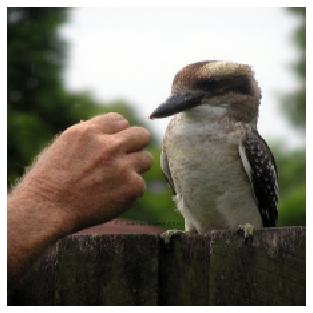

In [431]:
show_img(data.val_ds.denorm(to_np(x))[60])

In [442]:
learn=ConvLearner.pretrained(f_model, data,metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 23628185.60it/s]


In [443]:
learn.opt_fn=optim.Adam
learn.lr_find(1e-5,100)

 78%|███████▊  | 25/32 [00:22<00:02,  3.24it/s, loss=11.1]

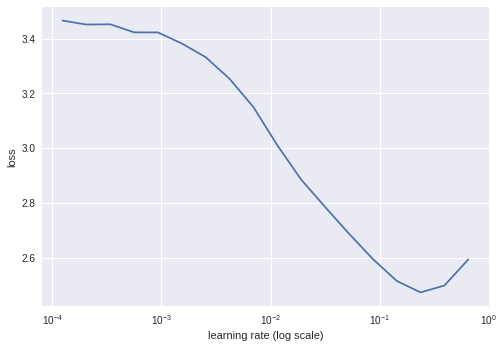

In [445]:
learn.sched.plot(n_skip=5,n_skip_end=1)

In [446]:
lr=2e-2
learn.fit(lr,1,cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.289412   0.668843   0.802     


[array([0.66884]), 0.8020000023841858]

In [448]:
lrs=np.array([lr/1000,lr/10,lr])
learn.freeze_to(-2)
learn.fit(lrs/5,1,cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.990263   0.726498   0.794     


[array([0.7265]), 0.7940000009536743]

In [449]:
learn.unfreeze()
learn.fit(lrs/5,1,cycle_len=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.82128    1.079947   0.718     
    1      0.535834   0.690911   0.786     


[array([0.69091]), 0.7860000014305115]

In [469]:
preds = to_np(learn.model(VV(x)))
np.argmax(preds[2])

13

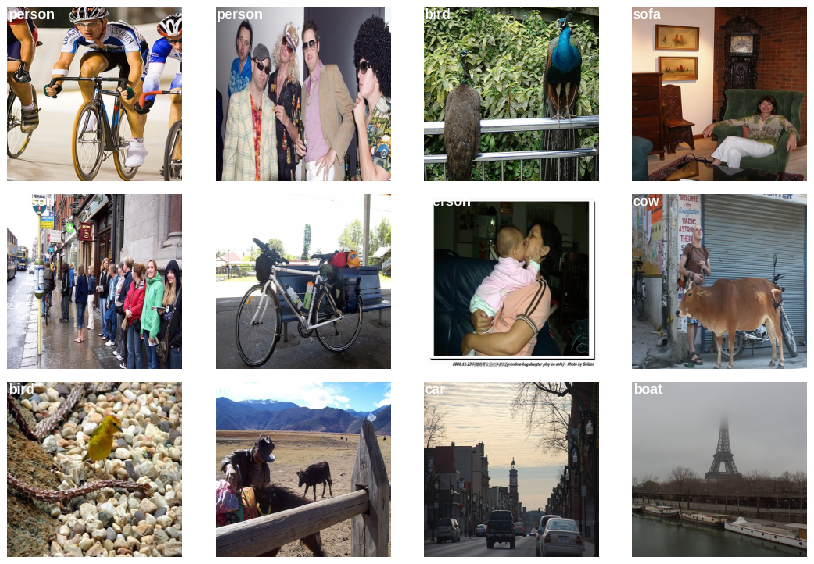

In [481]:
preds = to_np(learn.model(VV(x)))
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=data.val_ds.denorm(x)[i*4]
    cat_id=int(data.classes[np.argmax(preds[i*4])])
    b = cats[cat_id]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

In [0]:
bb=np.array([trn_max_annotation[i][0] for i in trn_ids])

In [0]:
bbs=[' '.join(str(item) for item in x) for x in bb]


In [0]:
BB_CSV = PATH/'tmp/bb.csv'
df=pd.DataFrame({'bbox':bbs,'file_name':[trn_fns[i] for i in trn_ids]},columns=['file_name','bbox'])
df.to_csv(BB_CSV,index=False)

In [32]:
df.head()

,file_name,bbox
0,000012.jpg,96 155 269 350
1,000017.jpg,77 89 335 402
2,000023.jpg,1 2 461 242
3,000026.jpg,124 89 211 336
4,000032.jpg,77 103 182 374


In [0]:
f_model=resnet34
sz=224
bs=64

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, 
                       tfm_y=TfmType.COORD)
data = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True)

In [0]:
x,y= next(iter(data.val_dl))

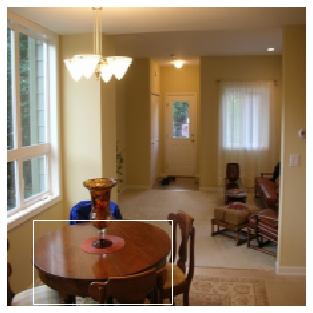

In [524]:
bb=bb_voc(to_np(y[7]))
ax=show_img(data.val_ds.denorm(to_np(x))[7])
draw_rect(ax, bb)

In [0]:
head_reg4=nn.Sequential(Flatten(),nn.Linear(7*7*512,4))

In [0]:
?learn.crit

In [0]:
learn=ConvLearner.pretrained(f_model,data,custom_head=head_reg4)
learn.opt_fn=optim.Adam
learn.crit=nn.L1Loss()

In [528]:
learn.lr_find(1e-5,100)

 84%|████████▍ | 27/32 [00:21<00:02,  1.94it/s, loss=632]

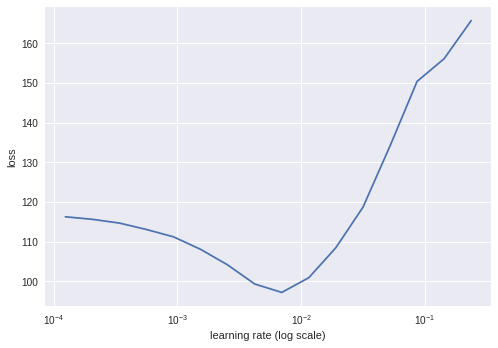

In [530]:
learn.sched.plot(5)

In [531]:
lr=1e-3
learn.fit(lr,2, cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   
    0      50.706071  37.829208 
    1      39.207076  29.613568 
    2      33.298076  28.981457 


[array([28.98146])]

In [532]:
lr=1e-3
learn.fit(lr,2, cycle_len=1)

epoch      trn_loss   val_loss   
    0      27.115688  27.646018 
    1      25.834052  26.594924 


[array([26.59492])]

In [535]:
lrs=np.array([lr/100,lr/10,lr])
learn.freeze_to(-2)
learn.lr_find(lrs/1000)

epoch      trn_loss   val_loss   
    0      75.23718   2.8609133658121436e+16


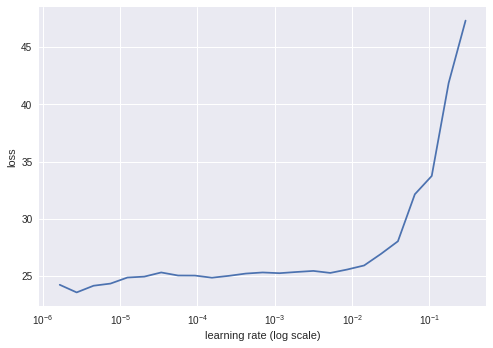

In [536]:
learn.sched.plot(1)

In [537]:
learn.fit(lrs,2,cycle_len=1)

epoch      trn_loss   val_loss   
    0      23.646683  23.441923 
    1      20.202839  22.076286 


[array([22.07629])]

In [538]:
learn.fit(lrs,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   
    0      16.732752  21.789428 
    1      15.332191  21.665033 
    2      13.284218  20.844543 


[array([20.84454])]

In [539]:
learn.freeze_to(-3)
learn.fit(lrs,1,cycle_len=1)

epoch      trn_loss   val_loss   
    0      11.919385  21.276553 


[array([21.27655])]

LESSON 9

In [0]:
f_model=resnet34
sz=224
bs=64

In [0]:
id_idxs=get_cv_idxs(len(trn_fns))

In [0]:
augs=[RandomRotate(3,p=0.5,tfm_y=TfmType.COORD),RandomFlip(tfm_y=TfmType.COORD),RandomLighting(0.1,0.1,tfm_y=TfmType.COORD),RandomRotateZoom(30,1.5,1.3,tfm_y=TfmType.COORD)]

In [0]:
tfms=tfms_from_model(f_model, sz, aug_tfms=augs, crop_type=CropType.NO, tfm_y=TfmType.COORD,)

In [0]:
data=ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,continuous=True,val_idxs=id_idxs)

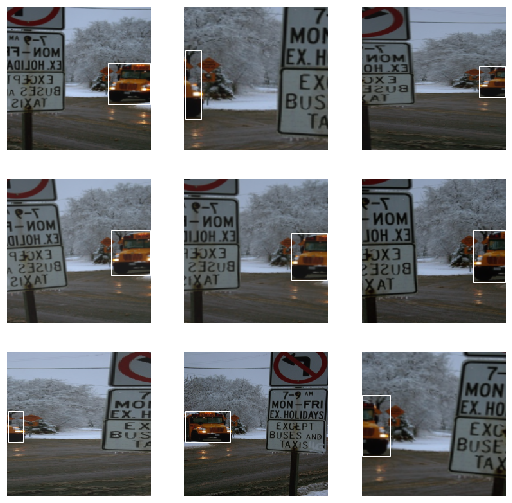

In [46]:
idx=5
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
  x,y=next(iter(data.aug_dl))
  img=data.val_ds.denorm(to_np(x))[idx]
  b=bb_voc(to_np(y[idx]))
  show_img(img,ax=ax)
  draw_rect(ax,b)

In [0]:
data_reg=ImageClassifierData.from_csv(PATH,JPEGS, BB_CSV,tfms=tfms, val_idxs=id_idxs, continuous=True)
data_clas=ImageClassifierData.from_csv(PATH,JPEGS, CSV, val_idxs=id_idxs, tfms=tfms_from_model(f_model, sz))

In [0]:
class ConcatDataset(Dataset):
  def __init__(self, ds, y2):
    self.ds=ds
    self.y2=y2
  def __len__(self):
    return len(self, ds)
  def __getitem__(self, i):
    x,y=self.ds[i]
    return (x, (y, self.y2[i]))

In [0]:
trn_ds=ConcatDataset(data_reg.trn_ds,data_clas.trn_y)
val_ds=ConcatDataset(data_reg.val_ds, data_clas.val_y)

In [0]:
data_reg.trn_dl.dataset=trn_ds
data_reg.val_dl.dataset=val_ds

In [0]:
x, y = next(iter(data_reg.trn_dl))

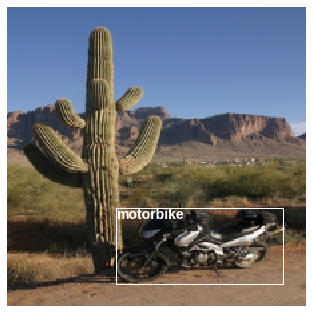

In [54]:
idx=6
img=data_reg.val_ds.ds.denorm(to_np(x))[idx]
b=bb_voc(to_np(y[0])[idx])
ax=show_img(img)
draw_rect(ax,b)
draw_text(ax, b[:2],data_clas.classes[y[1][idx]])

In [0]:
head_reg=nn.Sequential(Flatten(),
                       nn.ReLU(), 
                       nn.Dropout(0.5),
                       nn.Linear(7*7*512,256), 
                       nn.ReLU(),
                       nn.BatchNorm1d(256),                
                       nn.Dropout(0.5),
                       nn.Linear(256, 4+len(cats)))

In [53]:
models=ConvnetBuilder(f_model,0,0,0,custom_head=head_reg)
learn=ConvLearner(data_reg,models)
learn.opt_fn=optim.Adam

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 50002281.94it/s]


In [0]:
def detn_loss(input, target):
  bb_t, clas_t=target
  bb_i, clas_i=input[:,:4], input[:,4:]
  bb_i=F.sigmoid(bb_i)*224
  return F.l1_loss(bb_i,bb_t)+F.cross_entropy(clas_i,clas_t)*20

In [0]:
def detn_l1(input, target):
  bb_t, _ = target
  bb_i = input[:,:4]
  bb_i = F.sigmoid(bb_i)*224
  return F.l1_loss(V(bb_i),V(bb_t)).data

In [0]:
def detn_acc(input, target):
  _, clas_t=target
  clas_i=input[:,4:]
  return accuracy(clas_i, clas_t)

In [0]:
learn.crit=detn_loss
learn.metrics=[detn_l1, detn_acc]

In [101]:
lr=1e-2
learn.fit(lr, 1,cycle_len=3, use_clr=(32,5))

epoch      trn_loss   val_loss   detn_l1    detn_acc   
    0      44.792752  43.471801  30.285314  0.788     
    1      43.462332  37.930489  26.64869   0.822     
    2      40.527089  36.360143  25.608201  0.838     


[array([36.36014]), 25.608200759887694, 0.8380000009536743]

In [109]:
lr=1e-2
learn.fit(lr, 1,cycle_len=3)

epoch      trn_loss   val_loss   detn_l1    detn_acc   
    0      39.034321  37.426937  25.477289  0.8       
    1      38.231493  36.619487  24.700667  0.812     
    2      36.475627  35.69663   24.167563  0.826     


[array([35.69663]), 24.167562774658204, 0.8259999980926513]

In [110]:
learn.save('reg1_0')
learn.freeze_to(-2)
lrs = np.array([lr/100, lr/10, lr])
learn.fit(lrs/5, 1, cycle_len=5, use_clr=(32,10))

epoch      trn_loss   val_loss   detn_l1    detn_acc   
    0      37.156895  37.947548  24.115131  0.792     
    1      35.070086  34.888295  22.506371  0.798     
    2      32.32291   31.768086  20.779053  0.844     
    3      29.673711  31.092684  20.422487  0.838     
    4      28.112238  31.400589  20.015903  0.836     


[array([31.40059]), 20.015902877807616, 0.8359999995231628]

In [111]:
learn.unfreeze()
learn.fit(lrs/10,1, cycle_len=10, use_clr=(32,10))

epoch      trn_loss   val_loss   detn_l1    detn_acc   
    0      25.994504  32.679032  20.268375  0.816     
    1      26.032263  34.824328  20.813263  0.804     
    2      25.381859  31.910724  20.074303  0.826     
    3      24.356523  32.807404  19.904575  0.802     
    4      23.839442  32.259561  19.767827  0.812     
    5      22.959483  31.800619  19.540253  0.81      
    6      22.262633  30.638778  19.26689   0.822     
    7      21.577702  30.607225  19.322309  0.818     
    8      21.261077  30.160186  19.159553  0.832     
    9      20.684724  30.357915  19.07184   0.822     


[array([30.35791]), 19.071840423583986, 0.8219999980926513]